# Exercice 1. Nuage des points

## Question 1

In [1]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [2]:
iris = pd.read_csv('irisdata.csv')
iris.head()

,sepal-long,sepal-larg,petal-long,petal-larg,espece
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2

In [3]:
iris.describe()

,sepal-long,sepal-larg,petal-long,petal-larg
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris['espece'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: espece, dtype: int64

Il y a bien le même nombre d'observations pour chaque espèce

## Question 3

<IPython.core.display.Javascript object>


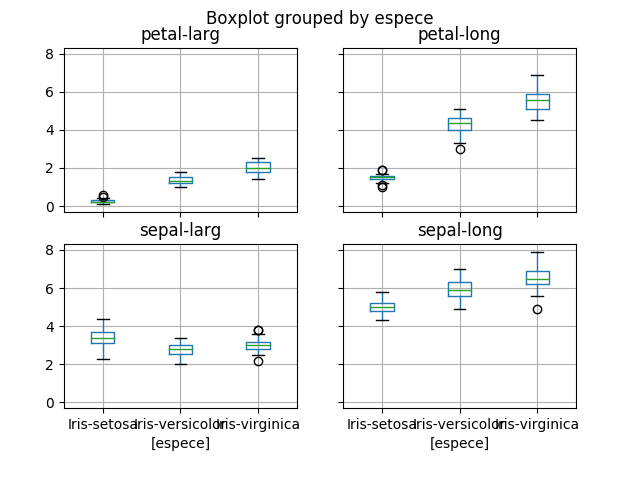

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e3fb2610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e0adde50>]], dtype=object)

In [5]:
iris.boxplot(by='espece')

On observe que la variable **petal-long** pourrait nous aider à différentier les espèces. Cependant, pour les autres variables les boxplots selon chaque espèce sont très similaires.

## Question 4

<IPython.core.display.Javascript object>


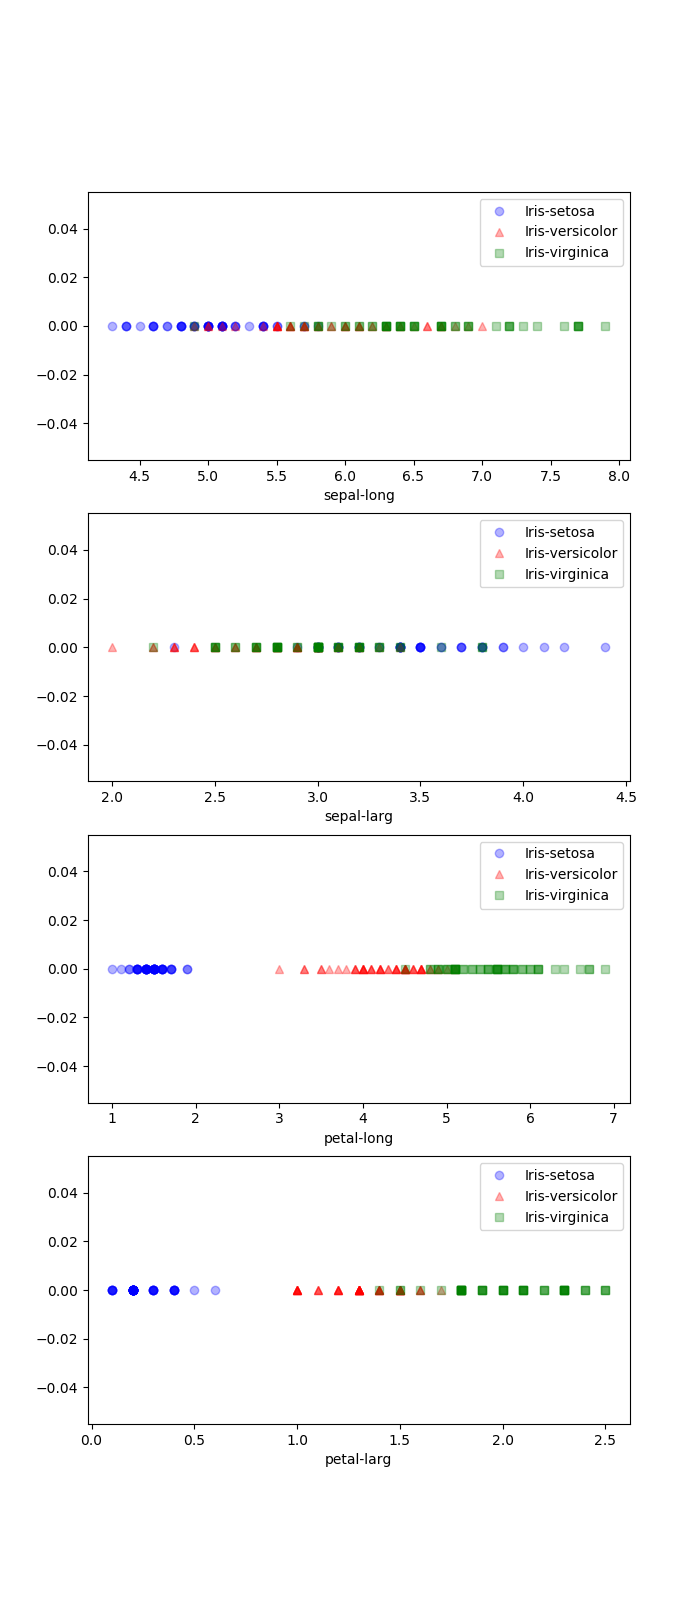

In [6]:
especes = iris['espece'].unique()
variables = iris.columns.values[:-1]
p = len(variables)
plt.figure(figsize=(7,4*p))

for i, v in enumerate(variables):
    plt.subplot(p,1,i+1)
    for e, c, s in zip(especes,['blue','red','green'],['o','^','s']):
        plt.plot(iris.loc[iris['espece']==e,v],np.zeros(50),s,color=c,label=e,alpha=0.3)
        plt.xlabel(v)
    plt.legend(loc='best')

## Question 5

On commence par définir une fonction combinliste(seq,k) qui renvoie toutes les combinaisons de k éléments d'une liste seq

In [7]:
def combinliste(seq, k):
    if k==1:
        return [[el] for el in seq]
    else:
        p = []
        seq_copy = seq[:]
        for el in seq:
            seq_copy.remove(el)
            for el2 in combinliste(seq_copy,k-1):
                p.append([el] + el2)
        return p

In [8]:
variables = iris.columns.values[:-1]
combinliste(list(variables), 2)

[['sepal-long', 'sepal-larg'],
 ['sepal-long', 'petal-long'],
 ['sepal-long', 'petal-larg'],
 ['sepal-larg', 'petal-long'],
 ['sepal-larg', 'petal-larg'],
 ['petal-long', 'petal-larg']]

In [9]:
combinliste(list(variables), 3)

[['sepal-long', 'sepal-larg', 'petal-long'],
 ['sepal-long', 'sepal-larg', 'petal-larg'],
 ['sepal-long', 'petal-long', 'petal-larg'],
 ['sepal-larg', 'petal-long', 'petal-larg']]

Puis, on calcule l'ensemble des combinaisons de 2 variables possibles parmis les 4 du jeu de données et pour chacune de ces combinaisons, on affiche le nuage des points de dimension 2

<IPython.core.display.Javascript object>


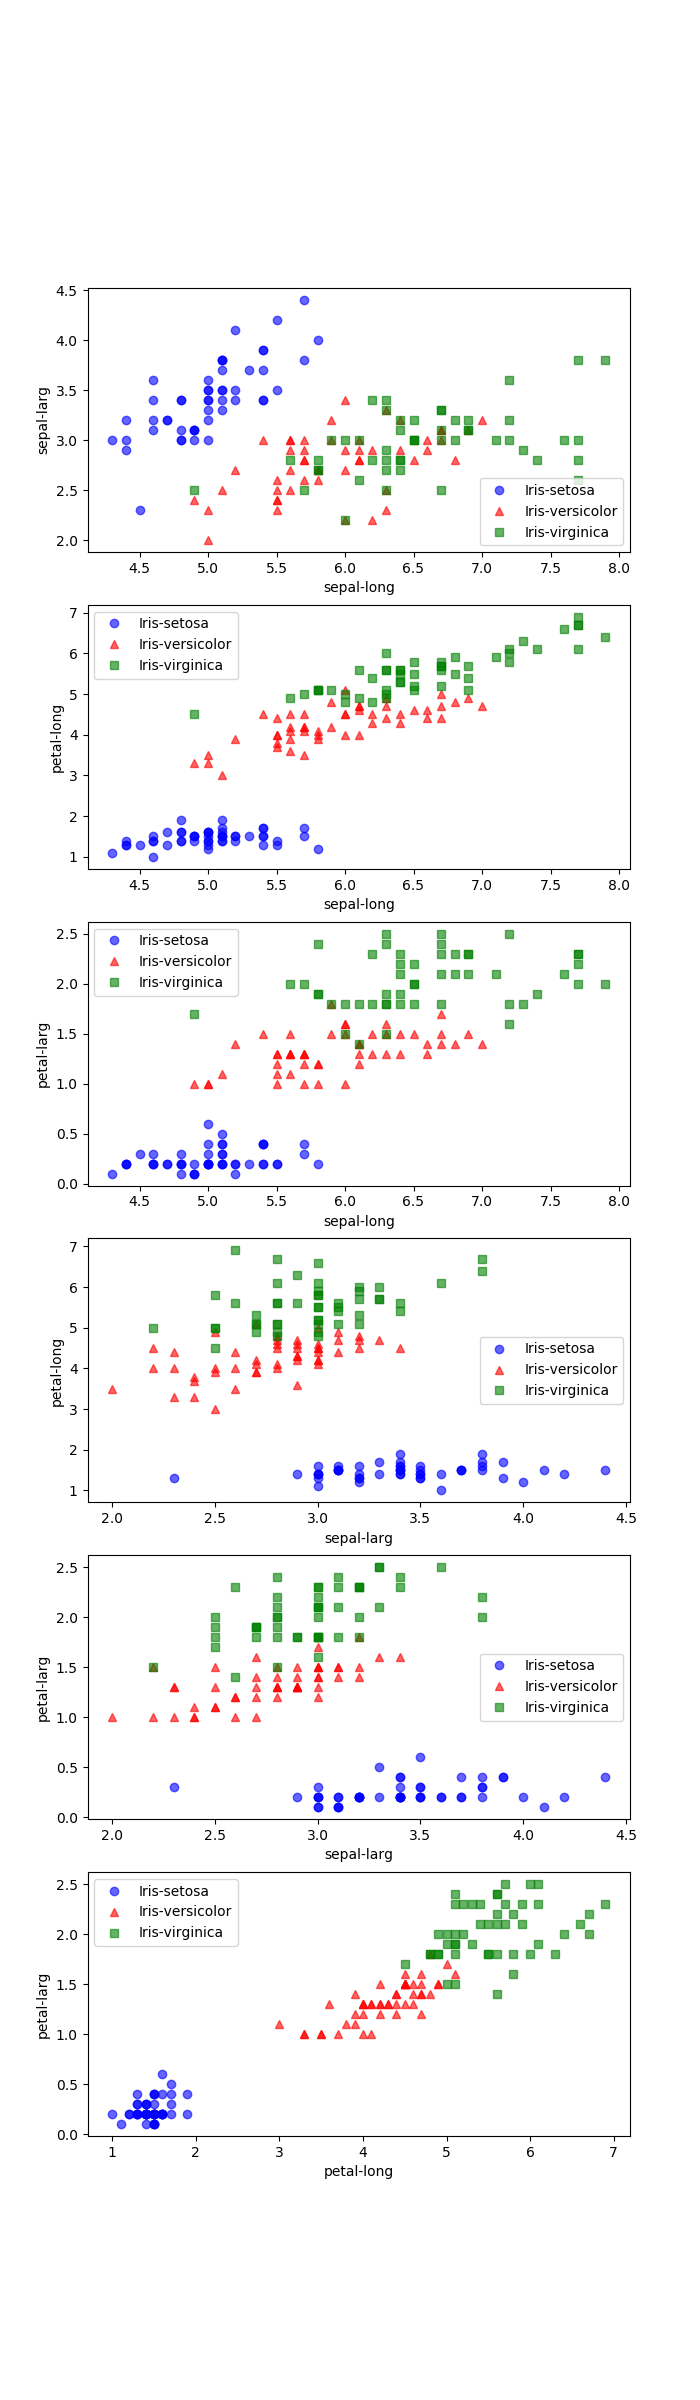

In [10]:
especes = iris['espece'].unique()
variables = iris.columns.values[:-1]
variables_dim2 = combinliste(list(variables), 2)
p = len(variables_dim2)
plt.figure(figsize=(7,4*p))

for i, v in enumerate(variables_dim2):
    plt.subplot(p,1,i+1)
    for e, c, s in zip(especes,['blue','red','green'],['o','^','s']):
        plt.plot(iris.loc[iris['espece']==e,v[0]],iris.loc[iris['espece']==e,v[1]],s,color=c,label=e,alpha=0.6)
        plt.xlabel(v[0])
        plt.ylabel(v[1])
    plt.legend(loc='best')

## Question 6

En utilisant la réponse à la question 5, on peut tout d'abords choisir les variables **petal-long**, **petal-larg** car c'est la combinaison de deux variables qui sépare le mieux le nuage des points entre les différentes espèces. Puis, en utilisant la réponse à la question 4, on peut choisir la variable **sepal-long** car parmis les deux dernières variables c'est celle qui sépare le mieux le nuage des points en dimension 1.

In [11]:
iris.head()

,sepal-long,sepal-larg,petal-long,petal-larg,espece
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
especes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<IPython.core.display.Javascript object>


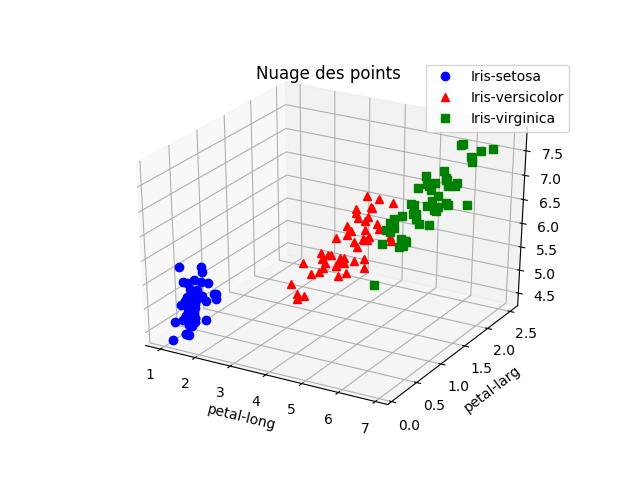

In [13]:
fig = plt.figure()
fig.add_subplot(111, projection='3d')
for e, c, s in zip(especes,['blue','red','green'],['o','^','s']):
    plt.plot(iris.loc[iris['espece']==e,'petal-long'].values,iris.loc[iris['espece']==e,'petal-larg'].values,iris.loc[iris['espece']==e,'sepal-long'].values,s,color=c,label=e,alpha=1)
plt.title('Nuage des points')
plt.legend(loc=0)
plt.xlabel('petal-long')
plt.ylabel('petal-larg')

## Question 7

<IPython.core.display.Javascript object>


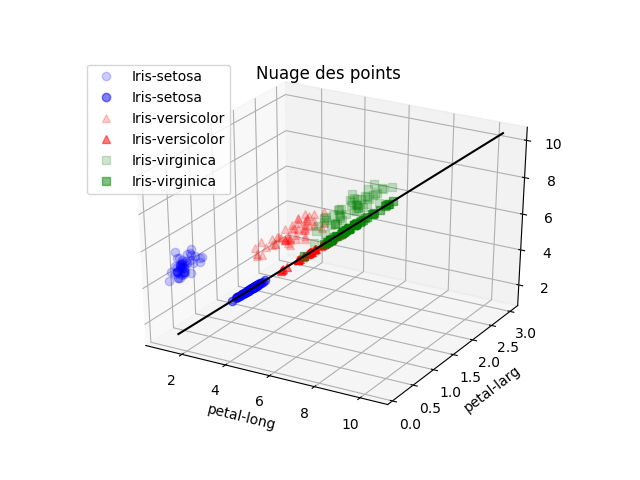

In [14]:
vect_dir = np.array([7.,2.,7.]).reshape(3,1)/np.sqrt(102.)
coef = np.dot(iris[['petal-long','petal-larg','sepal-long']].values,vect_dir)
proj = np.outer(coef,vect_dir)
iris_proj = pd.DataFrame(proj,columns=['petal-long','petal-larg','sepal-long'])
iris_proj['espece'] = iris['espece']

fig = plt.figure()
fig.add_subplot(111, projection='3d')
for e, c, s in zip(especes,['blue','red','green'],['o','^','s']):
    # On affiche le nuage de points en dimension 3
    plt.plot(iris.loc[iris['espece']==e,'petal-long'].values,iris.loc[iris['espece']==e,'petal-larg'].values,iris.loc[iris['espece']==e,'sepal-long'].values,s,color=c,label=e,alpha=0.2)
    # On affiche le projeté du nuage sur la droite engendré par le vecteur (7, 2, 7)
    plt.plot(iris_proj.loc[iris_proj['espece']==e,'petal-long'].values,iris_proj.loc[iris_proj['espece']==e,'petal-larg'].values,iris_proj.loc[iris_proj['espece']==e,'sepal-long'].values,s,color=c,label=e,alpha=0.5)
# On affiche la droite engendré par le vecteur (7, 2, 7)
plt.plot([1, 10.5], [2./7., 3.], [1, 10.5], color='black')
plt.title('Nuage des points')
plt.legend(loc=0)
plt.xlabel('petal-long')
plt.ylabel('petal-larg')

# Exercice 2. ACP 

## Question 3

In [15]:
moy = iris.mean()
iris_moy = iris[['sepal-long','sepal-larg','petal-long','petal-larg']].copy()
iris_moy.loc[:,'sepal-long'] = iris_moy['sepal-long'] - moy[0]
iris_moy.loc[:,'sepal-larg'] = iris_moy['sepal-larg'] - moy[1]
iris_moy.loc[:,'petal-long'] = iris_moy['petal-long'] - moy[2]
iris_moy.loc[:,'petal-larg'] = iris_moy['petal-larg'] - moy[3]

U, lamb, V  = np.linalg.svd(iris_moy)
print 'U : \n' , U, '\n lambda :\n', lamb, '\n V :\n', V, '\n'

U : 
[[ -1.06983726e-01  -5.43634040e-02   6.28902631e-03 ...,   5.42576376e-02
    1.60581494e-03   2.27770498e-03]
 [ -1.08226598e-01   2.82225381e-02   5.94998742e-02 ...,   5.32189412e-03
    8.56651825e-02   6.44405862e-03]
 [ -1.15178765e-01   2.28610154e-02  -7.22379342e-03 ...,   2.76010922e-02
    1.78415121e-01   1.49430370e-01]
 ..., 
 [  7.03091072e-02  -1.30694264e-02  -3.82349658e-02 ...,   9.89545817e-01
   -1.24233079e-02  -6.58105858e-04]
 [  7.57927216e-02  -1.92875487e-02  -2.11333455e-01 ...,  -1.40226565e-02
    9.52228601e-01  -2.32385318e-02]
 [  5.53875515e-02   4.70861605e-02  -1.05924305e-01 ...,  -7.86338250e-04
   -2.19591161e-02   9.77215825e-01]] 
 lambda :
[ 25.08986398   6.00785254   3.42053538   1.87850234] 
 V :
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]] 



In [16]:
iris_proj = pd.DataFrame(U[:,[0,1,2,3]], columns=['CP1','CP2','CP3','CP4'] )
iris_proj['CP1'] = lamb[0]*iris_proj['CP1']
iris_proj['CP2'] = lamb[1]*iris_proj['CP2']
iris_proj['CP3'] = lamb[2]*iris_proj['CP3']
iris_proj['CP4'] = lamb[3]*iris_proj['CP4']
iris_proj.head()

,CP1,CP2,CP3,CP4
0,-2.684207,-0.326607,0.021512,0.001006
1,-2.715391,0.169557,0.203521,0.099602
2,-2.889820,0.137346,-0.024709,0.019305
3,-2.746437,0.311124,-0.037672,-0.075955
4,-2.728593,-0.333925,-0.096230,-0.063129


<IPython.core.display.Javascript object>


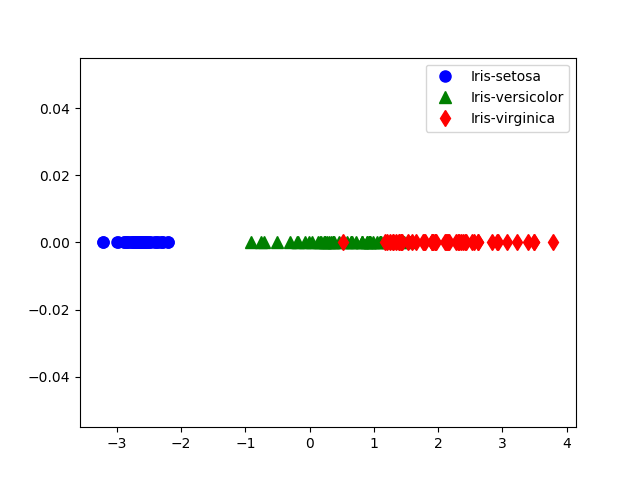

In [17]:
id_seto = (iris['espece']== 'Iris-setosa')
id_vers = (iris['espece']== 'Iris-versicolor')
id_virg = (iris['espece']== 'Iris-virginica')

plt.figure()
plt.plot(iris_proj.loc[id_seto,'CP1'],np.zeros(50), 'o', markersize=8, color='blue', label='Iris-setosa')
plt.plot(iris_proj.loc[id_vers,'CP1'],np.zeros(50), '^', markersize=8, color='green', label='Iris-versicolor')
plt.plot(iris_proj.loc[id_virg,'CP1'],np.zeros(50), 'd', markersize=8, color='red', label='Iris-virginica')
plt.legend()

<IPython.core.display.Javascript object>


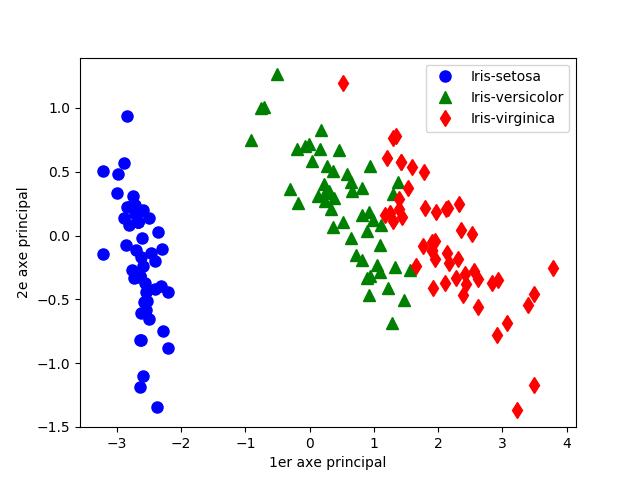

In [18]:
plt.figure()
plt.plot(iris_proj.loc[id_seto,'CP1'],iris_proj.loc[id_seto,'CP2'], 'o', markersize=8, color='blue', label='Iris-setosa')
plt.plot(iris_proj.loc[id_vers,'CP1'],iris_proj.loc[id_vers,'CP2'], '^', markersize=8, color='green', label='Iris-versicolor')
plt.plot(iris_proj.loc[id_virg,'CP1'],iris_proj.loc[id_virg,'CP2'], 'd', markersize=8, color='red', label='Iris-virginica')
plt.legend()
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')

<IPython.core.display.Javascript object>


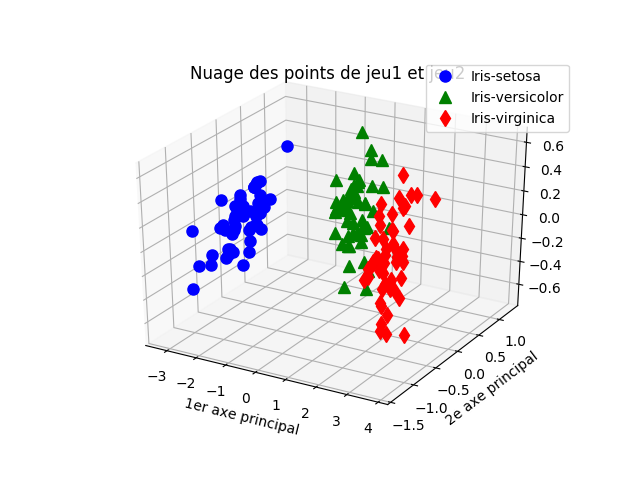

In [19]:
fig = plt.figure()
fig.add_subplot(111, projection='3d')
plt.plot(iris_proj.loc[id_seto,'CP1'],iris_proj.loc[id_seto,'CP2'],iris_proj.loc[id_seto,'CP3'], 'o', markersize=8, color='blue',  label='Iris-setosa')
plt.plot(iris_proj.loc[id_vers,'CP1'],iris_proj.loc[id_vers,'CP2'],iris_proj.loc[id_vers,'CP3'].values, '^', markersize=8, color='green', label='Iris-versicolor')
plt.plot(iris_proj.loc[id_virg,'CP1'],iris_proj.loc[id_virg,'CP2'],iris_proj.loc[id_virg,'CP3'].values, 'd', markersize=8, color='red', label='Iris-virginica')
plt.title('Nuage des points de jeu1 et jeu2')
plt.legend(loc=0)
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')

## Question 4

In [20]:
n = iris_moy.shape[0]
inertie_tot = ((iris_moy**2).sum()).sum()/n
print 'inertie totale (par la permière formule): ', inertie_tot

inertie totale (par la permière formule):  4.53882933333


In [21]:
print 'inertie totale (par la deuxième formule): ',sum(lamb**2)/n

inertie totale (par la deuxième formule):  4.53882933333


In [22]:
print "part d'inertie expliquée par la première composante principale :\n", lamb[0]**2/sum(lamb**2)

part d'inertie expliquée par la première composante principale :
0.924616207174


In [23]:
(iris[['sepal-long','sepal-larg','petal-long','petal-larg']]).var()*(n-1)/sum(lamb**2)

sepal-long    0.150066
sepal-larg    0.041145
petal-long    0.681327
petal-larg    0.127463
dtype: float64

In [24]:
print "part d'inertie expliquée par les deux premières composantes principales :\n", sum(lamb[0:2]**2)/sum(lamb**2)

part d'inertie expliquée par les deux premières composantes principales :
0.977631775025


In [25]:
print "part d'inertie expliquée par les trois premières composantes principales :\n", sum(lamb[0:3]**2)/sum(lamb**2)

part d'inertie expliquée par les trois premières composantes principales :
0.99481691455


In [26]:
from sklearn.decomposition import PCA

In [27]:
sklearn_pca = PCA() 
df_transf = sklearn_pca.fit_transform(iris[['sepal-long','sepal-larg','petal-long','petal-larg']])  
df_transf

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02],
       [ -2.27989736e+00,   7.47782713e-01,   1.74325619e-01,
         -2.71468037e-02],
       [ -2.82089068e+00,  -8.21045110e-02,   2.64251085e-01,
         -5.00996251e-02],
       [ -2.62648199e+00,   1.70405349e-01,  -1.58015103e-02,
         -4.62817610e-02],
       [ -2.88795857e+00,  -5.70798026e-01,   2.73354061e-02,
         -2.66154143e-02],
       [ -2.67384469e+00,  -1.06691704e-01,  -1.91533300e-01,
         -5.58909660e-02],
       [ -2.50652679e+00,   6.51935014e-01,  -6.92749958e-02,
         -1.66082478e-02],
       [ -2.61314272e

<IPython.core.display.Javascript object>


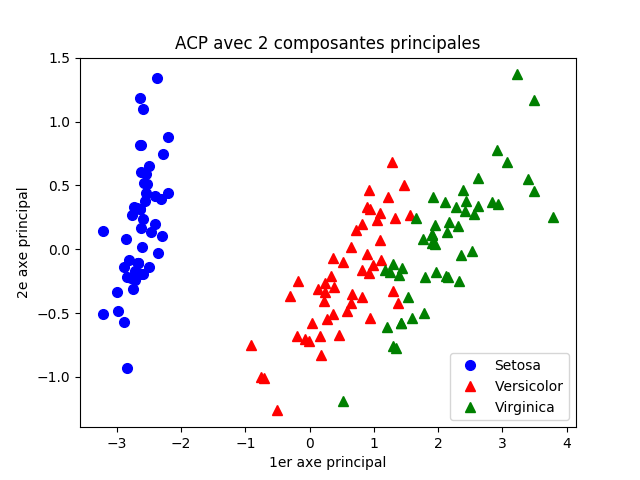

In [28]:
plt.figure()
plt.plot(df_transf[0:49,0],df_transf[0:49,1], 'o', markersize=7, color='blue', label='Setosa')
plt.plot(df_transf[50:99,0], df_transf[50:99,1], '^', markersize=7, color='red', label='Versicolor')
plt.plot(df_transf[100:149,0], df_transf[100:149,1], '^', markersize=7, color='green', label='Virginica')
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')

In [29]:
inerties = sklearn_pca.explained_variance_   # inertie expliquée par chaque composante principale
print "Part d'inertie expliquée par une, deux, trois composantes principales :\n", np.cumsum(inerties)/np.sum(inerties)
print 'valeurs singulieres :', np.sqrt(inerties*n)

Part d'inertie expliquée par une, deux, trois composantes principales :
[ 0.92461621  0.97763178  0.99481691  1.        ]
valeurs singulieres : [ 25.17391736   6.02797941   3.4319945    1.8847955 ]


On voit qu'on retrouve les mêmes valeurs que par l'autre méthode.

# ACP avec des données centrées réduites

Jusqu'ici on a effectué l'ACP avec un tableau de données dont les colonnes sont centrées (moyenne 0). Pour des données réelles, il est courant de diviser en plus chaque colonne par son écart-type pour se ramener à des données centrées réduites. Ceci est d'autant plus important que les ordres de grandeurs des variances des différentes colonnes varient.

Pour voir que ceci change les résultats, faisons l'ACP avec les données centrées réduites :

In [30]:
std = iris.std()
iris_std = iris[['sepal-long','sepal-larg','petal-long','petal-larg']].copy()
iris_std.loc[:,'sepal-long'] = (iris_std['sepal-long']- moy[0])/std[0]
iris_std.loc[:,'sepal-larg'] = (iris_std['sepal-larg']- moy[1])/std[1]
iris_std.loc[:,'petal-long'] = (iris_std['petal-long']- moy[2])/std[2]
iris_std.loc[:,'petal-larg'] = (iris_std['petal-larg']- moy[3])/std[3]

In [31]:
sklearn_pca = PCA() 
df_std = sklearn_pca.fit_transform(iris_std)  
df_std

array([[ -2.25698063e+00,   5.04015404e-01,  -1.21536190e-01,
         -2.29962838e-02],
       [ -2.07945912e+00,  -6.53216394e-01,  -2.26492063e-01,
         -1.02863642e-01],
       [ -2.36004408e+00,  -3.17413945e-01,   5.13077379e-02,
         -2.77323192e-02],
       [ -2.29650366e+00,  -5.73446613e-01,   9.85303586e-02,
          6.60900544e-02],
       [ -2.38080159e+00,   6.72514411e-01,   2.13563034e-02,
          3.72724209e-02],
       [ -2.06362348e+00,   1.51347827e+00,   3.05818064e-02,
         -4.38408784e-03],
       [ -2.43754534e+00,   7.43137171e-02,   3.41055070e-01,
          3.79693659e-02],
       [ -2.22638327e+00,   2.46787172e-01,  -8.22987560e-02,
          2.54200029e-02],
       [ -2.33413810e+00,  -1.09148977e+00,   1.53049668e-01,
          2.67043670e-02],
       [ -2.18136797e+00,  -4.47131117e-01,  -2.45736283e-01,
          3.97740567e-02],
       [ -2.15626287e+00,   1.06702096e+00,  -2.63127870e-01,
         -1.52500486e-02],
       [ -2.31960686e

In [32]:
n = iris.shape[0]
inertie_tot = ((iris_std**2).sum()).sum()/n
print 'inertie totale (par la permière formule): ', inertie_tot

inertie totale (par la permière formule):  3.97333333333


In [33]:
iris_std.var()*(n-1)/sum(lamb**2)

sepal-long    0.218852
sepal-larg    0.218852
petal-long    0.218852
petal-larg    0.218852
dtype: float64

In [34]:
inerties = sklearn_pca.explained_variance_   # inertie expliquée par chaque composante principale
print "Inertie d'une, deux, trois composantes principales :\n", np.cumsum(inerties)
print 'valeurs singulieres :', np.sqrt(inerties*n)

Inertie d'une, deux, trois composantes principales :
[ 2.91081808  3.83203901  3.97939229  4.        ]
valeurs singulieres : [ 20.89551896  11.75513248   4.7013819    1.75816839]


In [35]:
print 'Inertie totale par la 2e formule:', np.sum(inerties)

Inertie totale par la 2e formule: 4.0


In [36]:
print "Part d'inertie expliquée par une, deux, trois, quatre composantes principales:\n", np.cumsum(inerties)/np.sum(inerties)

Part d'inertie expliquée par une, deux, trois, quatre composantes principales:
[ 0.72770452  0.95800975  0.99484807  1.        ]


On voit que quasi toute la variance des données (95%) est capturée par les deux premières composantes principales. Ceci veut dire que les données, qui sont en 4D (parce qu'il ya quatre variables), vivent autour d'un plan, et l'ACP permet de retrouver ce plan. Faites tournez les nuages de points en 3D des variables d'origine pour vérifier que les observations sont bien toutes disposées près d'un plan 2D.

<IPython.core.display.Javascript object>


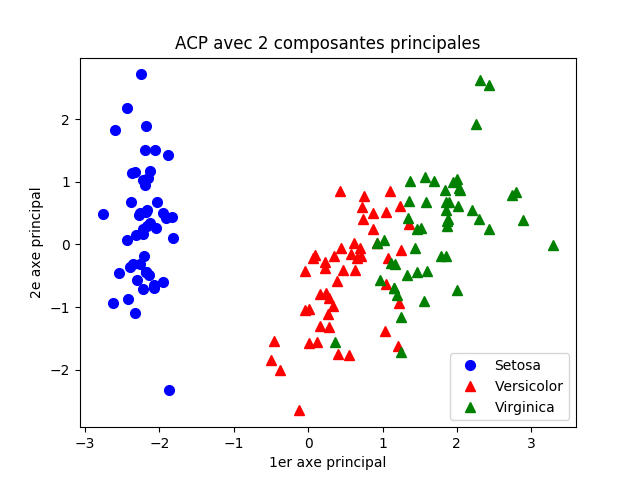

In [37]:
plt.figure()
plt.plot(df_std[0:49,0],df_std[0:49,1], 'o', markersize=7, color='blue', label='Setosa')
plt.plot(df_std[50:99,0], df_std[50:99,1], '^', markersize=7, color='red', label='Versicolor')
plt.plot(df_std[100:149,0], df_std[100:149,1], '^', markersize=7, color='green', label='Virginica')
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')